In [1]:
import torchvision
from torchvision.transforms import transforms
import torch
from PIL import Image
import time
from oads_access.oads_access import OADS_Access, add_label_box_to_axis, add_label_boxes_to_axis
from result_manager.result_manager import ResultManager
from matplotlib.backends.backend_pdf import PdfPages
from PIL import Image
from pytorch_utils.pytorch_utils import ToJpeg, ToOpponentChannel
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.colors import LinearSegmentedColormap


In [2]:
%matplotlib widget
basedir = '/home/niklas/projects/data/oads'

oads = OADS_Access(basedir=basedir, file_formats='.ARW', n_processes=16)
result_manager = ResultManager(root='/home/niklas/projects/oads_access/analysis/results')
figs = []


figsize = (15,15)

In [3]:
car_img = Image.open("/home/niklas/projects/data/car7.jpg")
img, obj = oads.load_image('0a0e1801856d4ded')

In [4]:
a = np.max(car_img, axis=(0,1)), np.min(car_img, axis=(0,1))
b = np.max(img, axis=(0,1)), np.min(img, axis=(0,1))
print(a,np.array(b)+[1,1,1])
np.min((np.array(a)+[10,10,10],np.array(b)+[1,20,30]))#, axis=(0))

(array([255, 255, 255], dtype=uint8), array([0, 0, 0], dtype=uint8)) [[256 256 256]
 [  1   1   1]]


1

[  0.   -73.25 -72.  ] [252.45  75.25 122.5 ]
[252.45  71.75 100.5 ] [  0.   -73.25 -66.5 ] jpeg
[252.45  75.25 122.5 ] [  2.69 -69.75 -72.  ] raw


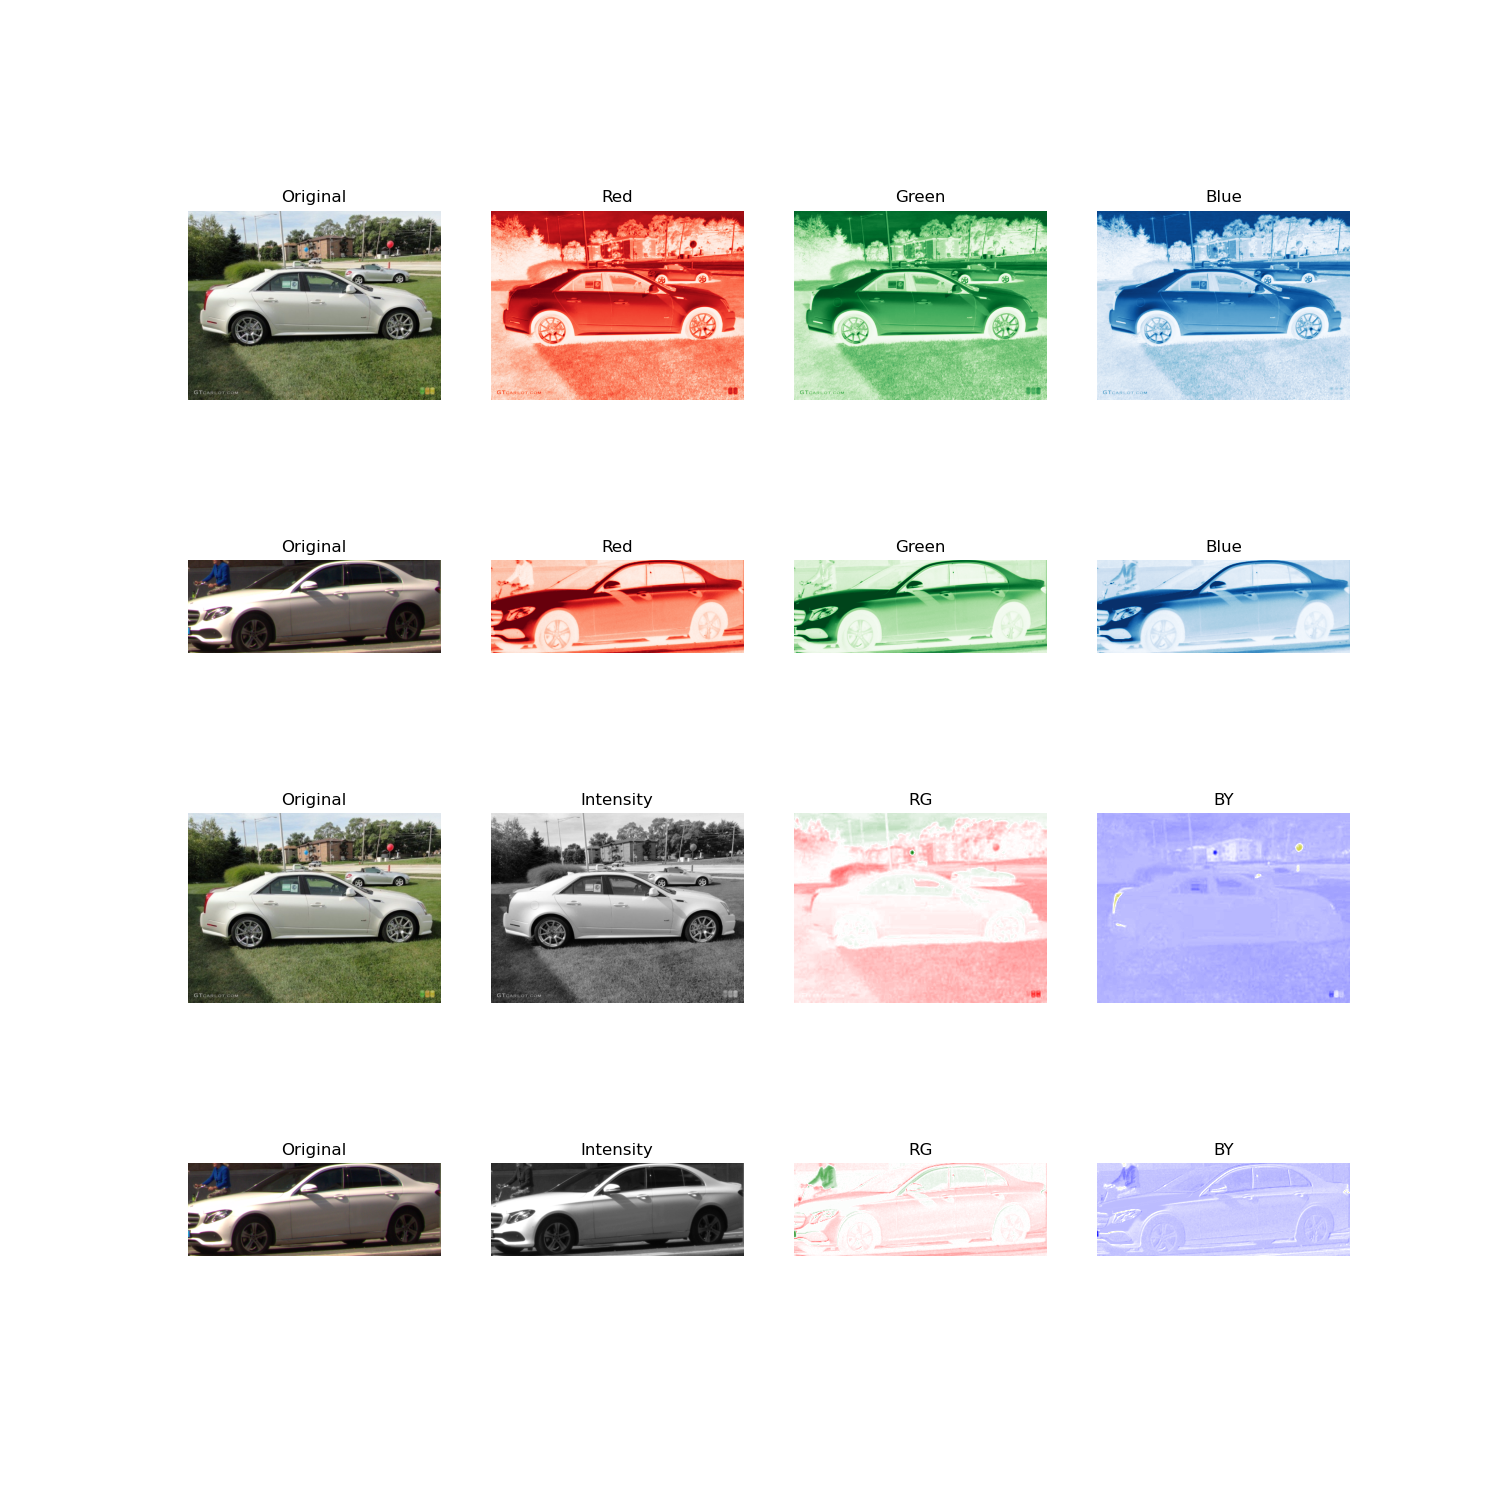

In [5]:
fig, ax = plt.subplots(4,4, figsize=figsize)

img, obj = oads.load_image('0a0e1801856d4ded')

crop_box = np.array(obj['objects'][3]['points']['exterior']).flatten()
raw_crop_box = crop_box * 4
raw_img = np.array(Image.fromarray(img).crop(raw_crop_box))

# coc = ToOpponentChannel()(car_img)
img = np.array(car_img)
ax[0, 0].imshow(img, vmin=0, vmax=255)
ax[0, 1].imshow(img[:,:,0], cmap='Reds', vmin=0, vmax=255)
ax[0, 2].imshow(img[:,:,1], cmap='Greens', vmin=0, vmax=255)
ax[0, 3].imshow(img[:,:,2], cmap='Blues', vmin=0, vmax=255)

ax[0, 0].axis('off')
ax[0, 1].axis('off')
ax[0, 2].axis('off')
ax[0, 3].axis('off')

ax[0, 0].set_title('Original')
ax[0, 1].set_title('Red')
ax[0, 2].set_title('Green')
ax[0, 3].set_title('Blue')

# figs.append(fig)


# fig, ax = plt.subplots(1,4, figsize=figsize)
cmap_rg =LinearSegmentedColormap.from_list('gr',["g", "w", "r"], N=256)
cmap_by =LinearSegmentedColormap.from_list('yb',["b", "w", "y"], N=256)

jpeg_coc = ToOpponentChannel()(car_img)
raw_coc = ToOpponentChannel()(raw_img)

vmin = np.min((np.min(jpeg_coc, axis=(0,1)), np.min(raw_coc, axis=(0,1))), axis=(0))
vmax = np.max((np.max(jpeg_coc, axis=(0,1)), np.max(raw_coc, axis=(0,1))), axis=(0))

print(vmin, vmax)
print(np.max(jpeg_coc, axis=(0,1)), np.min(jpeg_coc, axis=(0,1)), 'jpeg')
ax[2, 0].imshow(car_img, vmin=0, vmax=255)
ax[2, 1].imshow(jpeg_coc[:,:,0], cmap='gray', vmin=vmin[0], vmax=vmax[0])
ax[2, 2].imshow(jpeg_coc[:,:,1], cmap=cmap_rg, vmin=vmin[1], vmax=vmax[1])
ax[2, 3].imshow(jpeg_coc[:,:,2], cmap=cmap_by, vmin=vmin[2], vmax=vmax[2])

ax[2, 0].axis('off')
ax[2, 1].axis('off')
ax[2, 2].axis('off')
ax[2, 3].axis('off')

ax[2, 0].set_title('Original')
ax[2, 1].set_title('Intensity')
ax[2, 2].set_title('RG')
ax[2, 3].set_title('BY')

# figs.append(fig)


ax[1, 0].imshow(raw_img, vmin=0, vmax=255)
ax[1, 1].imshow(raw_img[:,:,0], cmap='Reds', vmin=0, vmax=255)
ax[1, 2].imshow(raw_img[:,:,1], cmap='Greens', vmin=0, vmax=255)
ax[1, 3].imshow(raw_img[:,:,2], cmap='Blues', vmin=0, vmax=255)

ax[1, 0].axis('off')
ax[1, 1].axis('off')
ax[1, 2].axis('off')
ax[1, 3].axis('off')

ax[1, 0].set_title('Original')
ax[1, 1].set_title('Red')
ax[1, 2].set_title('Green')
ax[1, 3].set_title('Blue')

# figs.append(fig)
# fig, ax = plt.subplots(1,4, figsize=figsize)
# cmap_rg =LinearSegmentedColormap.from_list('gr',["g", "w", "r"], N=256)
# cmap_by =LinearSegmentedColormap.from_list('yb',["y", "w", "b"], N=256)


print(np.max(raw_coc, axis=(0,1)), np.min(raw_coc, axis=(0,1)), 'raw')
ax[3, 0].imshow(raw_img, vmin=0, vmax=255)
ax[3, 1].imshow(raw_coc[:,:,0], cmap='gray', vmin=vmin[0], vmax=vmax[0])
ax[3, 2].imshow(raw_coc[:,:,1], cmap=cmap_rg, vmin=vmin[1], vmax=vmax[1])
ax[3, 3].imshow(raw_coc[:,:,2], cmap=cmap_by, vmin=vmin[2], vmax=vmax[2])

ax[3, 0].axis('off')
ax[3, 1].axis('off')
ax[3, 2].axis('off')
ax[3, 3].axis('off')

ax[3, 0].set_title('Original')
ax[3, 1].set_title('Intensity')
ax[3, 2].set_title('RG')
ax[3, 3].set_title('BY')

figs.append(fig)

In [6]:
result_manager.save_pdf(figs=figs, filename='Lowres_Highres_Comp_COC.pdf')